In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse,r2_score

In [2]:
df = pd.read_csv('ipl dataset.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## Dataset column info

- mid -> Each match is given a unique number
- date -> When the match happened
- venue -> Stadium where match is being played
- bat_team -> Batting team name
- bowl_team -> Bowling team name
- batsman -> Batsman name who faced that ball
- bowler -> Bowler who bowled that ball
- runs -> Total runs scored by team at that instance
- wickets -> Total wickets fallen at that instance
- overs -> Total overs bowled at that instance
- runs_last_5 -> Total runs scored in last 5 overs
- wickets_last_5 -> Total wickets that fell in last 5 overs
- striker -> max(runs scored by striker, runs scored by non-striker)
- non-striker -> min(runs scored by striker, runs scored by non-striker)
- total -> Total runs scored by batting team after first innings
### Dataset contains ball by ball detail of each match played in IPL from season 1 to 10(2008-2017).

# Exploring data

In [3]:
df.shape

(76014, 15)

In [4]:
#data have no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
#total number of teams in bat_team column 
print(df.bat_team.unique())
df.bat_team.nunique()

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


14

In [6]:
#total number of teams in bowl_team column 
print(df.bowl_team.unique())
df.bowl_team.nunique()
#both the numbers are same!!

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


14

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
print('Start date of 1st season of ipl:-',df['date'].min()) #initial date in dataset
print('End date of 10th season of ipl:-',df['date'].max())  #last date in dataset


Start date of 1st season of ipl:- 2008-04-18 00:00:00
End date of 10th season of ipl:- 2017-05-21 00:00:00


### Lets find out the player name and score which score the max runs in ipl

In [9]:
#my runs is 175
df.striker.max()

175

In [10]:
#lets find who scored this
df[df.striker==175]

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
42355,343,2013-04-23,M Chinnaswamy Stadium,Royal Challengers Bangalore,Pune Warriors,CH Gayle,AB Dinda,263,4,19.5,66,3,175,0,263
42356,343,2013-04-23,M Chinnaswamy Stadium,Royal Challengers Bangalore,Pune Warriors,R Rampaul,AB Dinda,263,5,19.6,65,4,175,0,263


- CH Gayle(Chris Gayle) hit max runs of 175 against Pune Warriors on 23 april 2013.

### Lets find out the team which hit the max runs againt which team

In [11]:
#my runs is 175
df.total.max()

263

In [12]:
#lets find who scored this
df[df.runs==263]

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
42355,343,2013-04-23,M Chinnaswamy Stadium,Royal Challengers Bangalore,Pune Warriors,CH Gayle,AB Dinda,263,4,19.5,66,3,175,0,263
42356,343,2013-04-23,M Chinnaswamy Stadium,Royal Challengers Bangalore,Pune Warriors,R Rampaul,AB Dinda,263,5,19.6,65,4,175,0,263


- Again the team which hit the max run is Royal Challengers Bangalore agains Pune Warriors.Even thought Royal Challengers Bangalore did not won any ipl trophy.RCB is a good overrall team.

### Lets find out the top most stadium where matches held the most

In [13]:
 df['venue'].value_counts() [:10]

M Chinnaswamy Stadium                         7443
Feroz Shah Kotla                              7068
Eden Gardens                                  7049
Wankhede Stadium                              7048
MA Chidambaram Stadium, Chepauk               5972
Rajiv Gandhi International Stadium, Uppal     5827
Punjab Cricket Association Stadium, Mohali    4247
Sawai Mansingh Stadium                        4110
Dr DY Patil Sports Academy                    2088
Subrata Roy Sahara Stadium                    2086
Name: venue, dtype: int64

# Feature Selection and Data Cleaning

### Important feature and Asumptions:-
  - runs(runs at a particular movement can be a very helpful in predicting the final score )
  - wickets( number of wickets fallen at a instance can also be very crutial for prediction as if less number of wickets fallen have a high chance of high score normally)
  - overs(over is also very important feature in prediction as at the start of the matchs player tends to score less runs as compared to the last 5 overs)
  - striker(player on the field have high score means its a good player,also is playing is the match for long and can hit a good score)
  - non-striker(it can also be helpfull in prediction ,like a low number of non stricker can lead to low runs and viceversa.)  

### Removing unwanted columns

In [14]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [15]:
df=df.drop(labels=['mid','date','venue','batsman', 'bowler','runs_last_5', 'wickets_last_5'],axis=1)

### Keeping only consistent teams

In [16]:
df.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [17]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [18]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
df.shape

(53811, 8)

### Removing the first 5 overs data in every match(as first 5 over do not play a major roll in predicting final score)

In [19]:
df = df[df['overs']>=5.0]
df.shape

(40108, 8)

### Checking corelation between features

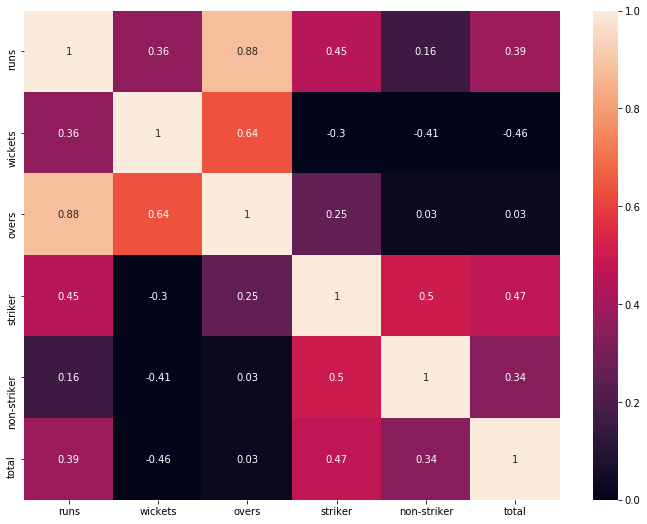

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr('pearson').round(2)
# annot = True to print the values inside the square
plt.subplots(figsize=(12,9))
sns.heatmap(data=corr,vmin=0, vmax=1, annot=True)

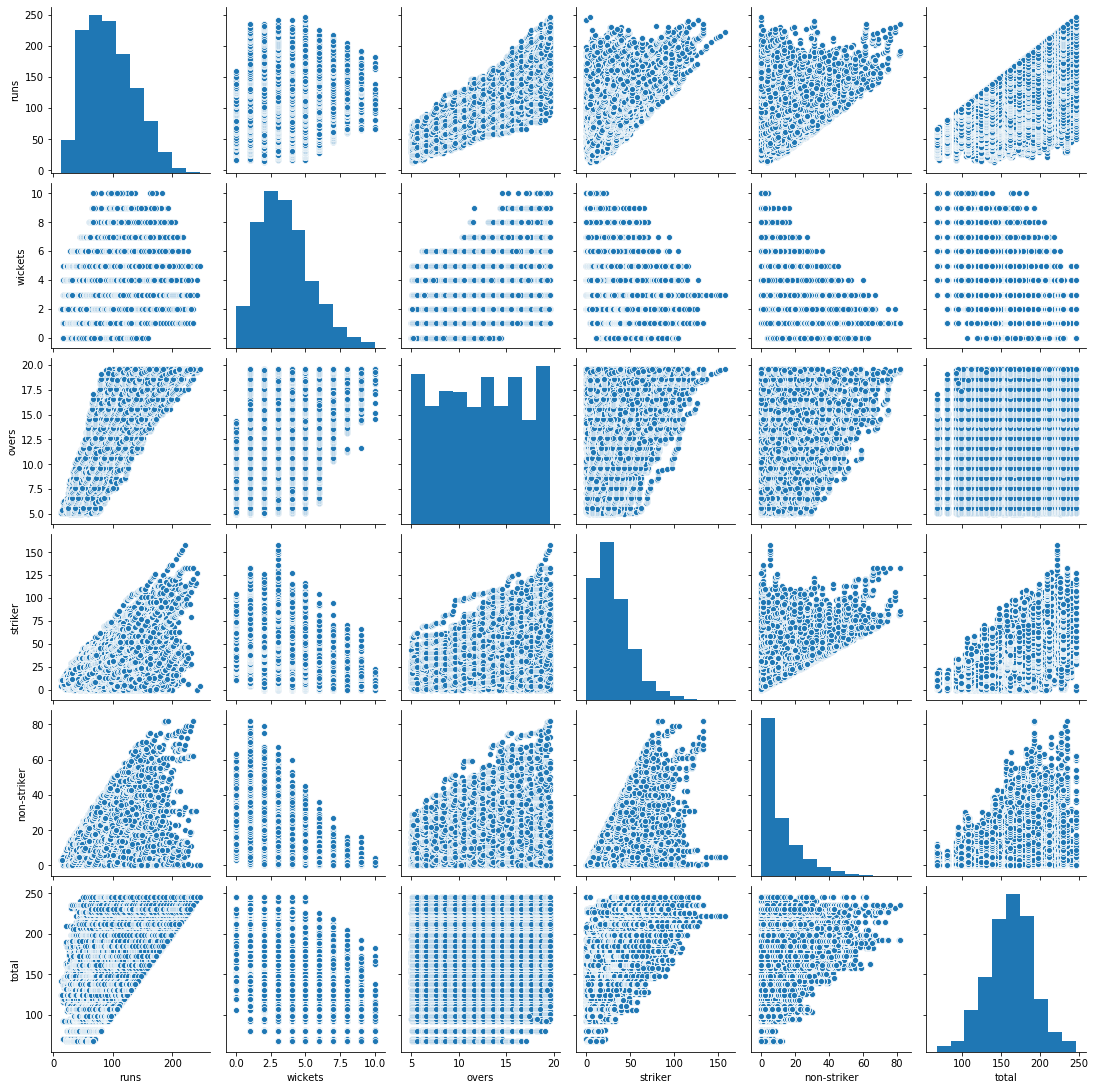

In [21]:
### Bivariate Analysis
sns.pairplot(df)

## Data Preprocessing

#### Handeling Categorical Features

In [22]:
df1 = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
df1.columns

Index(['runs', 'wickets', 'overs', 'striker', 'non-striker', 'total',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [23]:
df1.head()

,runs,wickets,overs,striker,non-striker,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,41,10,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,41,10,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,41,0,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,41,0,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,41,0,222,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [24]:
X=df1.drop('total',axis=1)
X.head()

,runs,wickets,overs,striker,non-striker,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,41,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,41,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,41,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,41,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,41,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
# Rearranging the columns(it help help when we deploy the model i.e in prediction)
X = X[['bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'striker', 'non-striker']]

In [26]:
X.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,striker,non-striker
32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.1,61,0,41,10
33,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.2,61,1,41,10
34,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.3,61,1,41,0
35,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.4,61,1,41,0
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.5,61,1,41,0


In [27]:
Y=df1['total']

### Train test split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 40)

In [29]:
print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (32086, 21) and Test set: (8022, 21)


## Model Building

### 1- Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
y_pred_lr = linear_regressor.predict(X_test)

In [31]:
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))
r2score_lr=r2_score(y_test,y_pred_lr)
print("R2 score of Linear Regression : ",r2score_lr)

Mean Absolute Error (MAE): 13.031662450414691
Mean Squared Error (MSE): 302.9667278380461
Root Mean Squared Error (RMSE): 17.405939441410396
R2 score of Linear Regression :  0.6602455653317175


### 2-Ridge And Lasso Regression

In [32]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X_train,y_train)
y_pred_ridge = ridge_regressor.predict(X_test)
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_ridge)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_ridge)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_ridge))))
r2score_rr=r2_score(y_test,y_pred_ridge)
print("R2 score of Linear Regression : ",r2score_rr)

Mean Absolute Error (MAE): 13.031603019379558
Mean Squared Error (MSE): 302.9663599766884
Root Mean Squared Error (RMSE): 17.40592887428558
R2 score of Linear Regression :  0.6602459778606065


In [33]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso()
lasso_regressor.fit(X_train,y_train)
y_pred_lasso = lasso_regressor.predict(X_test)
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lasso)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lasso)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lasso))))
r2score_lar=r2_score(y_test,y_pred_lasso)
print("R2 score of Linear Regression : ",r2score_lar)

Mean Absolute Error (MAE): 13.033574178619572
Mean Squared Error (MSE): 311.52275138773837
Root Mean Squared Error (RMSE): 17.65000712146424
R2 score of Linear Regression :  0.6506506274159998


### 3-Decision Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [35]:
y_pred_dt = decision_regressor.predict(X_test)
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))
r2score_dt=r2_score(y_test,y_pred_dt)
print("R2 score of random forest regressor = ",r2score_dt)

Mean Absolute Error (MAE): 3.4041386187983047
Mean Squared Error (MSE): 110.69808027923212
Root Mean Squared Error (RMSE): 10.521315520372541
R2 score of random forest regressor =  0.8758604155891351


### 4-Random Forest Regression

In [36]:
%%time
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)
y_pred_rf = random_regressor.predict(X_test)

Wall time: 22.9 s


In [37]:
#prediction on train data
y_pred_rf_train = random_regressor.predict(X_train)
r2score_rf_train=r2_score(y_train,y_pred_rf_train)
print("R2 score of random forest regressor = ",r2score_rf_train)

R2 score of random forest regressor =  0.9929341951901269


In [38]:
#prediction on test data
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))
r2score_rf=r2_score(y_test,y_pred_rf)
print("R2 score of random forest regressor = ",r2score_rf)

Mean Absolute Error (MAE): 3.7315748150918315
Mean Squared Error (MSE): 43.85823796176833
Root Mean Squared Error (RMSE): 6.6225552441461994
R2 score of random forest regressor =  0.9508162795611896


## Hyper Parameter Tuning Using GridSearchCV

#### Finding best number of estimators.

In [39]:
%%time
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [25,50,60,75,80,100,110,120]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = random_regressor, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

Wall time: 0 ns


In [40]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [41]:
grid_search.best_params_

{'n_estimators': 110}

In [42]:
grid_search.best_score_

0.9460134054495271

In [43]:
###building random forest model with n_estimator=110
random_regressor_best = RandomForestRegressor(n_estimators=110)
random_regressor_best.fit(X_train,y_train)
y_pred_rf_best = random_regressor_best.predict(X_test)

### Prediction on Unseen data (2018 IPL)

In [44]:
# making the funtion than will convert the input into the numerical form or we can say that making the input into 
# the form that can we accept by the model i.e random forest.
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=10, runs=100, wickets=1, striker=40,non_striker=20):
    temp_array = list()

    # Batting Team
    if batting_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

    # Bowling Team
    if bowling_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

    
    temp_array = temp_array + [overs, runs, wickets,striker,non_striker]
    temp_array = np.array([temp_array])

    return int(random_regressor_best.predict(temp_array)[0])

### Prediction on 16th April 2018 IPL match

#### https://www.hotstar.com/in/sports/cricket/quadrangular-under19-series-in-india-2019/india-a-under19-vs-india-b-under19-m189977/match-highlights/2018-kkr-give-gambhir-hell-on-eden-return/2001612224?utm_medium=Partnership&utm_source=Onebox&utm_campaign=IPL_2018_Rx
- time--->3:32
- Batting_team='Kolkata Knight Riders'
- Bowling_team='Delhi Daredevils'
- overs=13.3
- runs=117
- wickets=3
- striker=30
- non_striker=19
- Final runs scored by KKR-200/9

In [45]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=13.3, runs=117, wickets=3, striker=30,non_striker=19)
print("The final predicted score (range): {} to {}".format(final_score-5, final_score+10))

The final predicted score (range): 177 to 192


### Prediction of Finals of 2018 IPL

#### https://www.iplt20.com/video/144983/final-csk-vs-srh-match-highlights
- time--->2:34
- Batting_team='Sunrisers Hyderabad'
- Bowling_team='Chennai Super Kings'
- overs=15.4
- runs=133
- wickets=3
- striker=27
- non_striker=23
- Final runs scored by KKR-178/6

In [46]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Chennai Super Kings', overs=15.4, runs=133, wickets=3, striker=27,non_striker=23)
print("The final predicted score (range): {} to {}".format(final_score-5, final_score+10))

The final predicted score (range): 180 to 195


In [47]:
# time-->1:36
# predicting the match score in the early over is very difficult also the number of wicket is 2 in over 8 still the model predicted the value close to the final score there is a difference of 24 runs.
# Also we do not consider many other factors that effect the final runs.
# the model predicts the similar run as predicted when the match is live...verify by the video at point time of 1:33.PROJECTED()
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Chennai Super Kings', overs=8.3, runs=62, wickets=2, striker=29,non_striker=26)
print("The final predicted score (range): {} to {}".format(final_score-5, final_score+10))

The final predicted score (range): 141 to 156


### saving the model so that we can use it in deployment.we will be using Random Forest Regressor.

In [48]:
import pickle
pickle.dump(random_regressor_best, open('model2.pkl','wb'))

In [49]:
# the pickel file of model that we have saved for deployment is of size 116,so we will save the model in compressed formate
#and when we will use it in deployment we will decompress it and then use it for prediction.
import _pickle as cPickle
import gzip
with gzip.open('model_compressed', 'wb') as f:
    cPickle.dump(random_regressor_best, f)